Q21 ヒストグラム正規化

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2

imori_dark = cv2.imread("imori_dark.jpg")

def show_image(a):
    img_rgb = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.show()

def histgram(h_img):
    plt.hist(h_img.ravel(), bins=255, range=(0, 255), rwidth=0.7 )
    plt.show()

In [2]:
c = imori_dark.min()
d = imori_dark.max()


# 雑な条件。ほとんどの値は真ん中の条件になるからそれだけにした.
# 本当はその後上下の条件も抜いた方がいい
def conditions(x):
    return (255/(d-c))*(x-c) 



# def conditions(x):
#     if 0 <= x < c:
#         return 0
#     elif c <= x < d:
#         return (255/(d-c))*(x-c)
#     else:
#         return 255

# 直前の関数だとなぜかエラーが起きる
# 引数を条件分岐と返り値に使うとおかしくなるんかな？



def normalization(img):
    q_img = img.copy()
    b = img[:,:,0].copy()
    g = img[:,:,1].copy()
    r = img[:,:,2].copy()
    h,w,_ = img.shape
    
    q_img = np.zeros_like(img)  # q_imgを初期化
    
    q_b = list(map(conditions, np.array(b).reshape(-1,1)))
    q_g = list(map(conditions, np.array(g).reshape(-1,1)))
    q_r = list(map(conditions, np.array(r).reshape(-1,1)))
    
    q_img[:,:,0] = np.array(q_b).reshape(h,w)
    q_img[:,:,1] = np.array(q_g).reshape(h,w)
    q_img[:,:,2] = np.array(q_r).reshape(h,w)
    
    return q_img

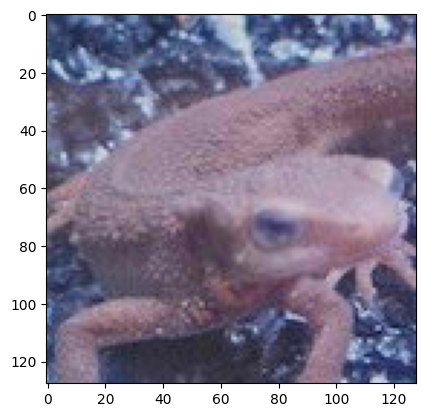

In [3]:
q21_img = normalization(imori_dark)
show_image(q21_img)

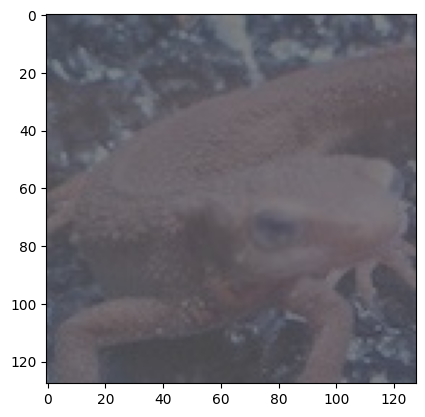

In [4]:
show_image(imori_dark)

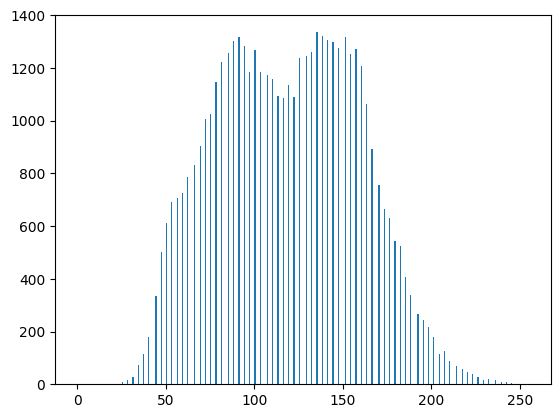

In [5]:
histgram(q21_img)